# Analisis Suara Sintetik dengan FFT

- Gunakan suara sintetik polikromatik yang telah dibuat pada Tugas sebelumnya, misalnya: 500 Hz, 550 Hz, 600 Hz. 
- Suara disimpan dalam file *.wav, misalnya suara500.wav, ...
- Membuat program Python 
  - Instal modul Python yang menyediakan code FFT
  - Lakukan analisis koef Fourier menggunakan FFT 
  - Plot koef Fourier

- Nama : Muhammad Rizky Anugrah
- NIM  : 1306620089
- Kelas: Fisika B
- Dosen: Nama: Dr.rer.nat. Bambang Heru Iswanto

## IMPORT

In [18]:
import sounddevice as sd
from scipy.io.wavfile import write
import wavio as wv
import matplotlib.pyplot as plt
import numpy as np
import librosa
from IPython.display import Audio
from scipy.fft import fft, fftfreq
import pandas as pd
import antropy as an

## SUARA MONOKROMATIS

In [2]:
sampling = 8000
amplitudo = 1.0/sampling
duration = np.arange(0,1,amplitudo)
frekuensi1 = 500
frekuensi2 = 550
frekuensi3 = 600
x1 = np.cos(2*np.pi*frekuensi1*duration)
x2 = np.cos(2*np.pi*frekuensi2*duration)
x3 = np.cos(2*np.pi*frekuensi3*duration)

## MEMBUNYIKAN SUARA MONOKROMATIS

In [3]:
sd.play(x1,sampling)

In [4]:
sd.play(x2,sampling)

In [5]:
sd.play(x3,sampling)

## MENYIMPAN SUARA MONOKROMATIS

In [6]:
wv.write("suara500.wav", x1, sampling, sampwidth=3)
wv.write("suara550.wav", x2, sampling, sampwidth=3)
wv.write("suara600.wav", x3, sampling, sampwidth=3)

## PLOTTING SUARA MONOKROMATIS

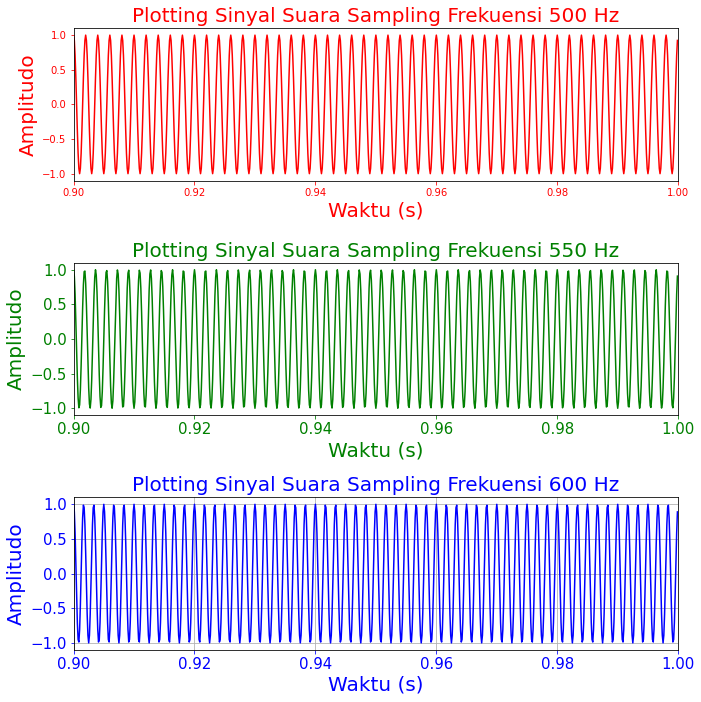

In [7]:
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
plt.title('Plotting Sinyal Suara Sampling Frekuensi 500 Hz', fontsize = 20, color = 'red')
plt.rcParams.update({'font.size': 15})
plt.tick_params(colors='red', which='both')
plt.xlabel('Waktu (s)', fontsize = 20, color = 'red')
plt.ylabel('Amplitudo', fontsize = 20, color = 'red')
plt.plot(duration,x1, color ='red')
plt.xlim(0.9,1)
plt.subplot(3,1,2)
plt.title('Plotting Sinyal Suara Sampling Frekuensi 550 Hz', fontsize = 20, color = 'green')
plt.tick_params(colors='green', which='both')
plt.xlabel('Waktu (s)', fontsize = 20, color = 'green')
plt.ylabel('Amplitudo', fontsize = 20, color = 'green')
plt.plot(duration,x2, color ='green')
plt.xlim(0.9,1)
plt.subplot(3,1,3)
plt.title('Plotting Sinyal Suara Sampling Frekuensi 600 Hz', fontsize = 20, color = 'blue')
plt.tick_params(colors='blue', which='both')
plt.xlabel('Waktu (s)', fontsize = 20, color = 'blue')
plt.ylabel('Amplitudo', fontsize = 20, color = 'blue')
plt.plot(duration,x3, color ='blue')
plt.xlim(0.9,1)
plt.tight_layout()
plt.grid(True)
plt.show()

## BUTTON PLAY

In [8]:
audio_data_500, sampling = librosa.load('suara500.wav', sr=None)
Audio(data=audio_data_500,rate=sampling)

In [9]:
audio_data_550, sampling = librosa.load('suara550.wav', sr=None)
Audio(data=audio_data_550,rate=sampling)

In [10]:
audio_data_600, sampling = librosa.load('suara600.wav', sr=None)
Audio(data=audio_data_600,rate=sampling)

## SUPERPOSISI SUARA POLIKROMATIS

In [11]:
superposisi = x1+x2+x3

## MEMBUNYIKAN SUARA SUPERPOSISI POLIKROMATIS

In [12]:
sd.play(superposisi,sampling)

## MENYIMPAN SUARA SUPERPOSISI POLIKROMATIS

In [13]:
wv.write("superposisi.wav", superposisi, sampling, sampwidth=3)

## PLOTTING  SUARA SUPERPOSISI POLIKROMATIS

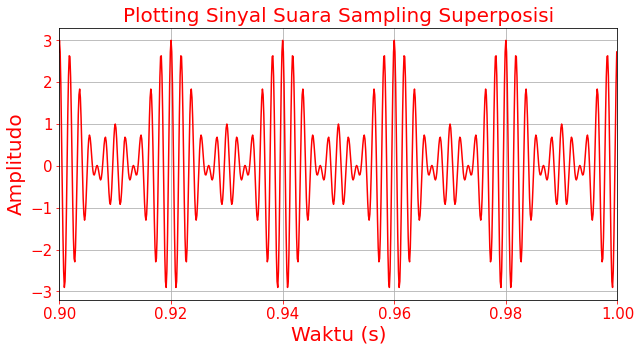

In [14]:
plt.figure(figsize=(10,5))
plt.title('Plotting Sinyal Suara Sampling Superposisi', fontsize = 20, color = 'red')
plt.rcParams.update({'font.size': 15})
plt.tick_params(colors='red', which='both')
plt.xlabel('Waktu (s)', fontsize = 20, color = 'red')
plt.ylabel('Amplitudo', fontsize = 20, color = 'red')
plt.plot(duration,superposisi, color ='red')
plt.xlim(0.9,1)
plt.grid(True)
plt.show()

## BUTTON PLAY

In [15]:
audio_data_superposisi, sampling = librosa.load('superposisi.wav', sr=None)
Audio(data=audio_data_superposisi,rate=sampling)

## FFFT Scipy

(100.0, 1000.0)

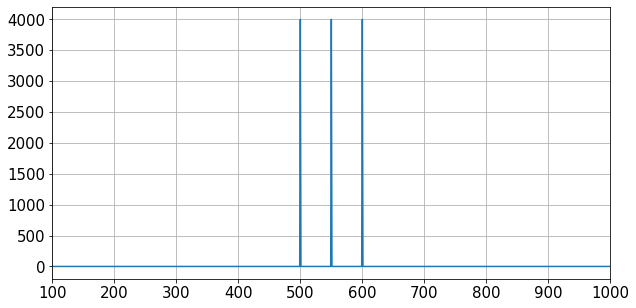

In [16]:
yf = fft(superposisi)
koefisien = np.abs(yf)
xf = fftfreq(sampling, amplitudo)
plt.figure(figsize=(10,5))
plt.plot(koefisien)
plt.grid()
plt.xlim(100,1000)

## Koefisien Fourier FFT

In [17]:
coef = pd.DataFrame((koefisien))
coef.to_csv("Koefisien_Fourier.csv")
coef=pd.read_csv('Koefisien_Fourier.csv')
coef

Unnamed: 0             0
0              0  2.563283e-12
1              1  5.526663e-12
2              2  1.860968e-12
3              3  1.862186e-12
4              4  1.717399e-12
...          ...           ...
7995        7995  2.980439e-12
7996        7996  1.717399e-12
7997        7997  1.862186e-12
7998        7998  1.860968e-12
7999        7999  5.526663e-12

[8000 rows x 2 columns]